<a href="https://colab.research.google.com/github/TurgutOzkan/Time_Series_Analysis/blob/master/Time_Series_2_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this post, we will cover main components of time series modeling. A time series has three important elements: trend, seasonal, and cyclical patterns. A trend is a consistent upward or downward movement. For example, Bitcoin’s movement showed a downward trend between January 2018 to August 2018. It is the easiest pattern to spot in a given time series. On the other hand, a time series is said to have a seasonality if it shows a repeating pattern at fixed time intervals. Summer vs winter difference in sunglass sales is a good example of seasonality. However, we mention cyclical patterns when data exhibit certain movements that are characterized by a fixed period. In other words, if fluctuations are not observed at a fixed interval, we are dealing with a cyclical pattern. If it is possible to associate these fluctuations with calendar time, then you have seasonality. To better differentiate those, examine the duration and magnitude of the fluctuations because cyclical patterns tend to be lengthier and higher in magnitude.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
date_time_index=pd.date_range(start="12-01-2012", periods=100, freq="M") # creates a date-time index object
data = np.random.randn(100,2) # Create random data for the time series
random_df = pd.DataFrame(data= data, index= date_time_index, columns=["X1", "X2"]) # converts to a dataframe using the date-time index 
new_data = np.random.random(100) # create a random noise.
random_df["X3"] = random_df.X1 + new_data*3 # add X1 and random noise
random_df.head()

,X1,X2,X3
2012-12-31,0.197479,0.571573,0.371316
2013-01-31,-0.978259,3.009822,1.817506
2013-02-28,-0.498656,0.013065,-0.062348
2013-03-31,0.944042,0.779608,1.042345
2013-04-30,-0.783066,-1.424151,0.769711


In [3]:
random_df.corr()

,X1,X2,X3
X1,1.000000,0.05133,0.770053
X2,0.051330,1.00000,0.044090
X3,0.770053,0.04409,1.000000


**Autocorrelation**

Autocorrelation is the correlation of a time series with a lagged version of itself. We can examine a series and its lagged values, say by two, and check the autocorrelation. Values close to 0 imply that consecutive observations are not correlated with each another.

**Plotting Autocorrelation**

We use statsmodels library for plotting autocorrelation and partial autocorrelation. White noise has autocorrelation of 0 at all lag values, which is what we observe below plot. On the other hand, partial autocorrelation measures the additive benefit of including another lag in the model (t-1, t-2, t-3, and so on). The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at lags. Autocorrelation function does not control for other lags.


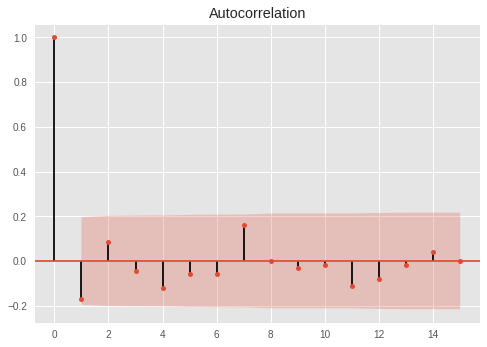

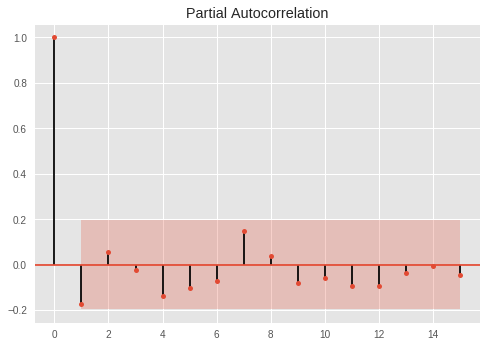

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig1 = tsaplots.plot_acf(random_df['X1'], lags=15)
fig2 = tsaplots.plot_pacf(random_df['X1'], lags=15)
plt.show()

**Composing a Time Series**

A given time series can be decomposed into three parts:

(1) Seasonality: Is there a periodic pattern? 

(2) Trend: Is there locally consistent upwards or downwards movements?

(3) Noise: Is there something that is inconsistent with the rest of the data?

Time series = Trend + Seasonality + Noise

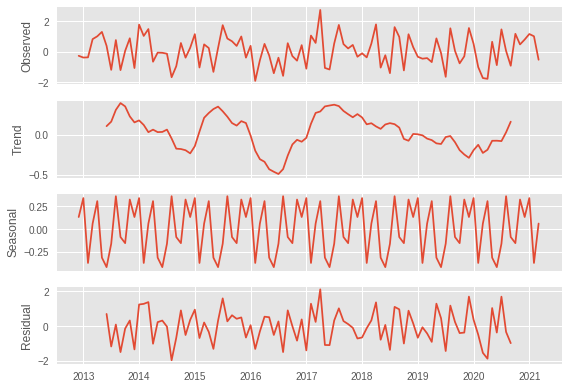

In [0]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(random_df.X1)
fig = decomp.plot()
plt.show()

**Using a Real World Dataset**

Since our values are random, there is no clear trend or seasonality. Our residuals center around zero values. 

download the data from https://www.kaggle.com/rakannimer/air-passengers/version/1#AirPassengers.csv

In [7]:
# Uploading the data
from google.colab import files

uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [11]:
df_air = pd.read_csv("AirPassengers.csv")
df_air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
import datetime
df_air.Month = pd.to_datetime(df_air.Month) # converts Month to datetime object
df_air = df_air.set_index("Month") # set Month as index
df_air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


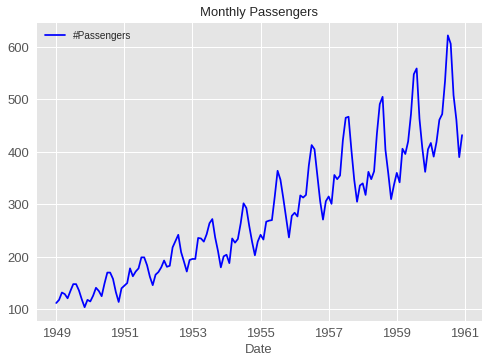

In [13]:
#plotting the data
ax = df_air.plot(color='blue', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.set_title('Monthly Passengers', fontsize=13)
plt.show()

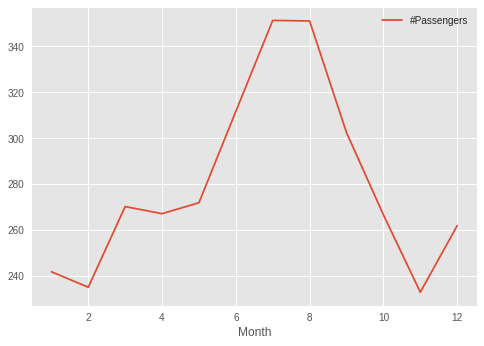

In [14]:
monthly_mean_passenger = df_air.groupby(df_air.index.month).mean()
monthly_mean_passenger.plot()

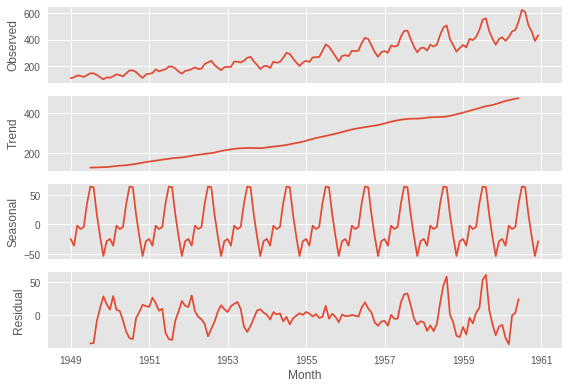

In [17]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(df_air['#Passengers'])
fig = decomp.plot()
plt.show()

As you see, in certain months, there are substantial increases in the volume of airline traffic. That should explain why tickets cost too much during summer! 

Autocorrelation function provides a holistic view on past and present values by focusing on beyond lag-1. A significant autocorrelation means that the series can be forecasted from the past. The shaded region is confidence interval.

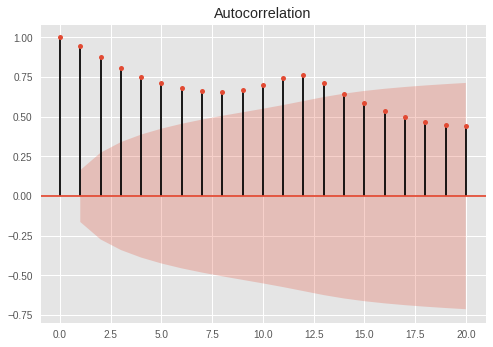

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(df_air["#Passengers"], lags= 20, alpha=0.05) # alpha is the width of the confidence interval.
plt.show()

**Stationarity**

In time series analysis, we generally assume that the series is stationary. What we mean by that is the mean and variance of the series is constant over time. What do we care? There are two main reasons. First is the technical reasons. You may not be able to get a reliable t and F test obtained as a result of regression (e.g., spurious regression). Second is the generalizability issue. Imagine you analyze a trend that is grossly fluctuating over time but you have only a fraction of the series as a snapshot (say from Time-1 to Time-2). Since you do not have the data between Time-4 and Time-5, your results may not hold true for data points. Finally, stationarity ensures parsimoniousness.

Stationary time series do not change their statistical properties over time. A random walk is a non-stationary series, for which the variance increases over time. White Noise: We call series with constant mean and variance as white noise. These series has no significant association with the past values. Therefore, we can conclude that a non-stationary time series is by definition against the idea of white noise.

**How Do I Know If My Series is Stationary?**

Good question. Well, there are three main methods:

(1) Graphical analysis

(2) Autocorrelation Function (ACF) and Correlogram

You examine the correlation between the value of a given point at Time(t) and Time(t-1) or all the way back to Time(t-n). 

(3) Unit Root Test

Unit root test is a hypothesis test on a regression where we regress the first difference on the period variable and one-lagged period value. It uses weighted averages of past observations, with most recent observations having more weight.

**Random Walk**

Random walk is the situation in which the next value in the sequence is defined as the previous value in the sequence and plus some white noise. Due to its very nature, we should expect a high autocorrelation with the previous observations. While white noises are completely driven by a stochastic process, random walk is based on yesterday's value plus some error.

$Y_t   = Y_t−1  +  ϵ_t$      Random Walk

$Y_t   = Y_t−1  +  ϵ_t$    Random walk with drift

Testing stationarity is done by Dickey-Fuller Test. Dickey-Fuller tests the null hypothesis that a unit root is present in an autoregressive model. In other words, the null hypothesis of the test is that the time series is non-stationary.  The usual t-test would assume stationarity, a thing we are trying to test! To make a nonstationary series stationary, we difference the data. If you add more lagged changes, it's the Augmented Dickey-Fuller test that needs to be done. Here is how:

 
 

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_air["#Passengers"])[1] # since p-value is more than 0.05 we fail to reject the null.

0.991880243437641

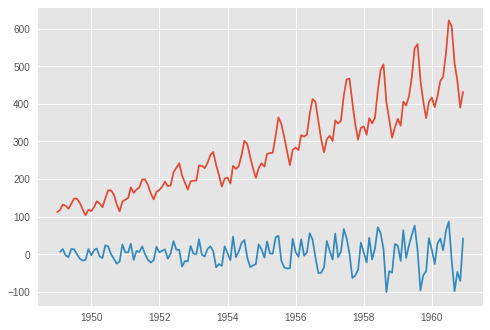

In [20]:
plt.plot(df_air["#Passengers"])
plt.plot(df_air["#Passengers"].diff()) # first difference (t - (t-1))

In [21]:
new = df_air
new["#Passengers"] =df_air["#Passengers"].diff()
new = df_air.dropna()
new.head()

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


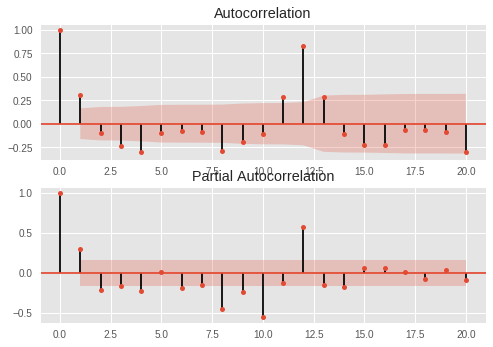

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# set up allowing the ACF and PACF appear together
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(new["#Passengers"], lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(new["#Passengers"], lags=20, ax=axes[1])
plt.show()

Since most time series data exhibit seasonal patterns, we remove the seasonality, which is called as seasonal adjustment. In this case, we take differences with a lag with relevant periodicity. The periodicity can vary depending the nature of your problem. It is just a special case of taking differences, but with a special lag number (3, 5 or something else) depending on the series.

**AR Models**

>>> $Y_t   =μ+ϕY_{t−1}  +ϵ_t$ 
AR model of order 1 or AR(1) model}

Notice that $ϕ=0$  turn this into white noise, whereas $ϕ=1$ turns into a random walk. When $ −1<ϕ<1 $, the series is considered stationary. The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.  For  $ϕ$ =+0.4, the first-lag autocorrelation will be 0.4, the second-lag will be (0.4)^2=0.16, the third-lag will be (0.4)^3 and so on... Below, we create a simulated data and then test if an AR model we create fits the data.

**Simulation**

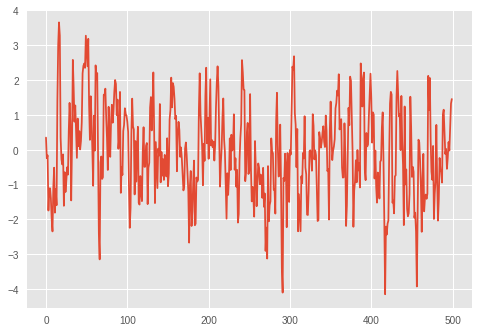

In [22]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.6]) # AR(1) process with phi 0.6
ma = np.array([1])
ar_model = ArmaProcess(ar, ma)
sample = ar_model.generate_sample(nsample=500)
plt.plot(sample)

**Estimating an AR Model**

In [23]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(sample, order=(1,0)) # AR(1) model
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(1, 0)   Log Likelihood                -714.720
Method:                       css-mle   S.D. of innovations              1.010
Date:                Fri, 25 Jan 2019   AIC                           1435.441
Time:                        23:40:35   BIC                           1448.085
Sample:                             0   HQIC                          1440.402
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.122     -0.468      0.640      -0.295       0.181
ar.L1.y        0.6298      0.035     18.150      0.000       0.562       0.698
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
print(result.params) # return $ \mu and \phi$ See how phi is close to what we simulated.

[0.14431408 0.59645555]


**How to tell the order of AR model?**


**(1) Partial Autocorrelation Function** \\
When you estimate the PACF on AR(1) model, you should see a significant lag-1 value, while on an AR(2), you should see significant lag-1 and lag-2 values.

**(2) Information criteria**
Using AIC and BIC, choose the lowest information criteria value. This basically penalizes models for overparameterization.

Another processes that need our attention are moving averages (MA) and ARMA models. We will not discuss them at length, rather we will work on data instead. These are rival processes and one of which may characterize your data better than others. So, you should find out which process is describing better the nature of data generation.

**MA Models (Moving Average)**

>>>>$Y_t   =  μ  +  ϵ_t +  θ_1 ϵ_{t−1}$ \\


The number of lagged error determines the order and theta value is named as MA parameter. In the above case, this is MA(1) model. For MA(2), we would have:

>>>> $Y_t   =  μ  +  ϵ_t +  θ_1 ϵ_{t−1} - θ_2 ϵ_{t−1}$ \\


**ARMA Models**

ARMA models can be thought of a combination of AR and MA models. Below is an exposition of an ARMA(1,1) model.

>>>>$ Y_t = \mu + \phi Y_{t-1} +\epsilon_t + \theta \epsilon_{t-1}$



**Cointegration**

If two random walk series result in a pattern when considered together. You can test cointegration by importing the following: from statsmodels.tsa.stattools import coint

**Air Passengers Data**

Now, let's divide our data into train and test sets and fit an AR(1) model.

In [0]:
new_train = new.iloc[:-20,:]
new_test = new.iloc[-20:,:]

In [25]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(new_train['#Passengers'].astype('float32'), order=(1,0)) # AR(1) model
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  123
Model:                     ARMA(1, 0)   Log Likelihood                -584.169
Method:                       css-mle   S.D. of innovations             27.942
Date:                Sat, 26 Jan 2019   AIC                           1174.338
Time:                        00:15:25   BIC                           1182.775
Sample:                    02-01-1949   HQIC                          1177.765
                         - 04-01-1959                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2857      3.351      0.682      0.496      -4.282       8.853
ar.L1.#Passengers     0.2501      0.087      2.877      0.005       0.080       0.421
                        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [26]:
print(result.aic)
print(result.bic)

1174.3383938573793
1182.7749469234966


Models we will try: AR(1), MA(1), and ARMA(1,1) to experiment best results.

In [27]:
from statsmodels.tsa.arima_model import ARMA
# Potential models to try
parameters = [(1,0), (0,1), (1,1)] # these are the corresponding values
str =["The AR(1) AIC is: ", "The MA(1) AIC is: ", "The ARMA(1,1) AIC is: "]

for i in range(len(parameters)):
    model = ARMA(new_train.astype('float32'), order=parameters[i])
    result = model.fit()
    print(str[i], result.aic)

The AR(1) AIC is:  1174.3383938573793
The MA(1) AIC is:  1171.575825685079
The ARMA(1,1) AIC is:  1164.464868086609


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


ARMA (1,1) fit best among the three. We can use the forecast() function for firecasting, which takes step=1 by default. Step is the number of out of sample forecasts from the end of the sample. For example, a single step refers to a forecast of the next in the sequence used to fit the model.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


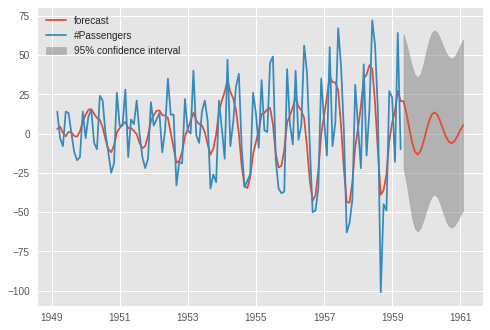

In [29]:
model = ARMA(new_train.astype('float32'), order=(2,2))
result = model.fit()
fig=result.plot_predict(start=1, end=144)
plt.show()

In [0]:
# You can also use predict method
pred=result.predict(start="1959-05-01", end="1960-12-01")
print(pred)

1959-05-01    20.580616
1959-06-01    13.221067
1959-07-01     3.711228
1959-08-01    -5.256353
1959-09-01   -11.399671
1959-10-01   -13.400712
1959-11-01   -11.152419
1959-12-01    -5.665477
1960-01-01     1.306767
1960-02-01     7.799365
1960-03-01    12.168832
1960-04-01    13.489160
1960-05-01    11.721310
1960-06-01     7.634681
1960-07-01     2.525815
1960-08-01    -2.172095
1960-09-01    -5.276248
1960-10-01    -6.137335
1960-11-01    -4.755346
1960-12-01    -1.714640
Freq: MS, dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


**ARIMA Models (AutoregRessive Integrated Moving Average)**

In setting up ARIMA models, three parameters (p, d, q) are determined. They refer to seasonality, trend, and noise in the data. Specifically, p is auto-regressive part, d is differencing, and finally, q is the moving average part of the model.

Nonseasonal arima models:

AR: Autoregressive denoted as (p). It indicates how many past values are being used in the model.

I: Differencing denoted as (d). It indicates the steps we have taken to make the series stationary.

MA: Moving average denoted as (q). It indicates the lag of the error component.

Data with seasonal effects requires the seasonal ARIMA, parameterized as ARIMA(p,d,q)(P,D,Q)s. While, (p, d, q) are the non-seasonal parameters described above,  (P, D, Q) refer to the seasonal component of the time series. Finally, s is the periodicity, expressed as 4 for quarterly periods, 12 for yearly periods, etc.). For a more through discussion see this and we will follow the grid approach outlined in the post. https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3



In [0]:
# recreate our train and test sets
new_train = df_air.iloc[:-20,:]
new_test = df_air.iloc[-20:,:]

In [33]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_train['#Passengers'],order=param, seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:994.1005776008477
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:758.1948402104786
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:851.7144928869733
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:823.1926177461977
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:765.4625031195823
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:760.1941061699202
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1161.5299168312583
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:983.0813879825021
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:831.6457690176564
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:749.2332009436424
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:843.8567954293658
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:804.4820184827014
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:763.0593312122612
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:748.8476355586962
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1037.7955730982774
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:837.6865961830159
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:948.0754231670106
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:925.1775518571517
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:846.80114

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:859.8138453543274
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:754.4749880398211
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:747.6561978752999


In [0]:
# I tested for both 4 and 12 for seasonality adjustment and 12 yielded better results.
#ARIMA(0, 1, 1)x(1, 1, 1, 4) - AIC:1061.568466863822
#ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:740.8569846180785

In [35]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(new_train['#Passengers'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    222.024     -0.005      0.996    -436.159     434.159
ar.S.L12   -1.713e-05      0.797  -2.15e-05      1.000      -1.563       1.563
ma.S.L12      -0.1100      0.806     -0.136      0.891      -1.689       1.469
sigma2       120.2518   2.67e+04      0.005      0.996   -5.22e+04    5.25e+04


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


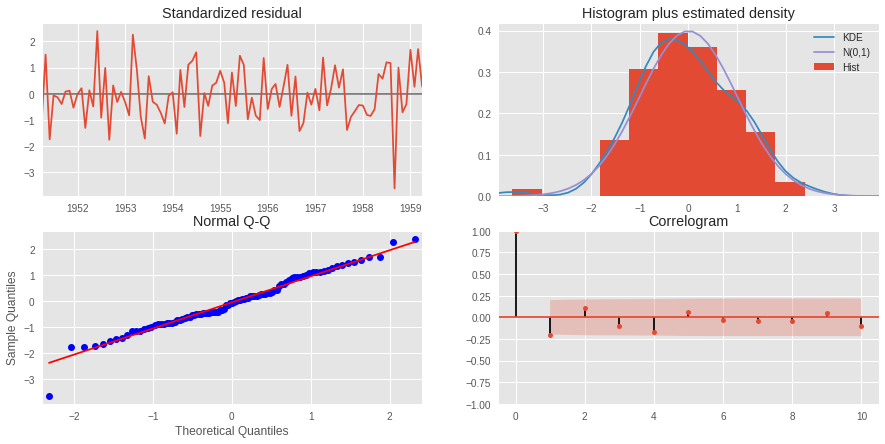

In [36]:
results.plot_diagnostics(figsize=(15, 7))
plt.show()

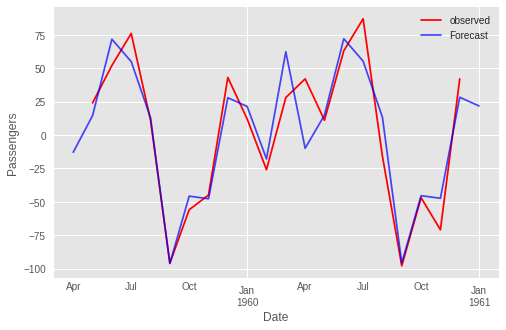

In [37]:
pred=results.predict(start=123, end=144, dynamic= False)

ax = new_test['#Passengers']['1959':].plot(label='observed', color='R')
pred.plot(ax=ax, label='Forecast',color='B', alpha=.7, figsize=(8, 5))

ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [0]:
# You can forecast individual values 
forecasted_0 = results.forecast()[0] # this forecasts the very next day if the last available day. Output is forecast, std.dev, and conf. int.
print('Forecasted:', forecasted_0)
print('Actual:', new_test.iloc[0,0])

Forecasted: 408.8525068332165
Actual: 420


That's pretty solid! 

**Sourced Used & Further Reading**

Gujarati, D. (2014). Econometrics by example. Palgrave Macmillan.